<a href="https://colab.research.google.com/github/NitinShindeJ/TensorFlow2.0/blob/master/My_learn_TF2.0/TF2_0_RNN_LSTM_Long_Distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Install Tensor flow
!pip install -q tensorflow==2.0.beta1

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
from tensorflow.keras.layers import SimpleRNN, Input, Dense, LSTM, GRU, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Optimizer, Adam, SGD

In [0]:
### build the dataset
# This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0: #-,-,-
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0: #-,+,+
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0: #+,-,+
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0: #+,+,-
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) # short distance
# y = get_label(x, 0, 1, 2)    # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [9]:
# Try a linear model first - note: it is classification now!
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the network
r = model.fit(
  X, Y,
  epochs=100,
  validation_split=0.5,
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 0s 139us/sample - loss: 0.7638 - accuracy: 0.5040 - val_loss: 0.7080 - val_accuracy: 0.4952
Epoch 2/100
2500/2500 [==============================] - 0s 62us/sample - loss: 0.6963 - accuracy: 0.5152 - val_loss: 0.6970 - val_accuracy: 0.4828
Epoch 3/100
2500/2500 [==============================] - 0s 63us/sample - loss: 0.6936 - accuracy: 0.5116 - val_loss: 0.6977 - val_accuracy: 0.4852
Epoch 4/100
2500/2500 [==============================] - 0s 62us/sample - loss: 0.6938 - accuracy: 0.5188 - val_loss: 0.6976 - val_accuracy: 0.4808
Epoch 5/100
2500/2500 [==============================] - 0s 62us/sample - loss: 0.6939 - accuracy: 0.5052 - val_loss: 0.6955 - val_accuracy: 0.4828
Epoch 6/100
2500/2500 [==============================] - 0s 62us/sample - loss: 0.6951 - accuracy: 0.5000 - val_loss:

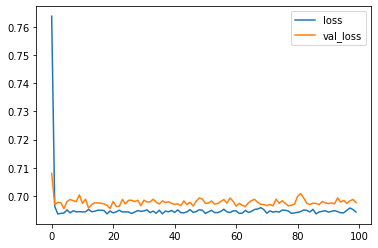

In [10]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

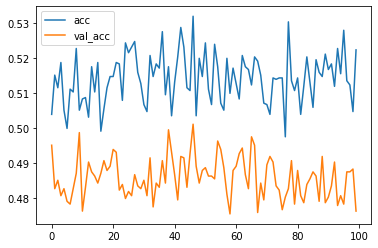

In [11]:
# Plot the accuracy too - should be around 50%
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
# Now try a simple RNN
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
# x = LSTM(5)(i)
x = SimpleRNN(5)(i)
# x = GRU(5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  # optimizer='rmsprop',
#   optimizer='adam',
  optimizer=Adam(lr=0.01),
  # optimizer=SGD(lr=0.1, momentum=0.9),
  metrics=['accuracy'],
)

In [13]:
# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 1s 364us/sample - loss: 0.6979 - accuracy: 0.5104 - val_loss: 0.6900 - val_accuracy: 0.5296
Epoch 2/200
2500/2500 [==============================] - 0s 144us/sample - loss: 0.6793 - accuracy: 0.6004 - val_loss: 0.6602 - val_accuracy: 0.6708
Epoch 3/200
2500/2500 [==============================] - 0s 143us/sample - loss: 0.6084 - accuracy: 0.7760 - val_loss: 0.5476 - val_accuracy: 0.8064
Epoch 4/200
2500/2500 [==============================] - 0s 145us/sample - loss: 0.4648 - accuracy: 0.8568 - val_loss: 0.3958 - val_accuracy: 0.8768
Epoch 5/200
2500/2500 [==============================] - 0s 143us/sample - loss: 0.3423 - accuracy: 0.8992 - val_loss: 0.3156 - val_accuracy: 0.8912
Epoch 6/200
2500/2500 [==============================] - 0s 143us/sample - loss: 0.2745 - accuracy: 0.9208 - val_loss: 0.2653 - val_accuracy: 0.9040
Epoch 7/200
2500/2500 [==============================] - 0

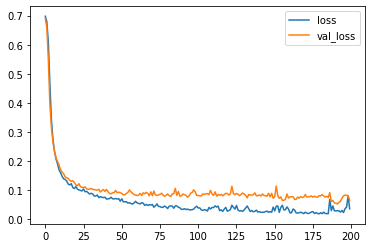

In [14]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

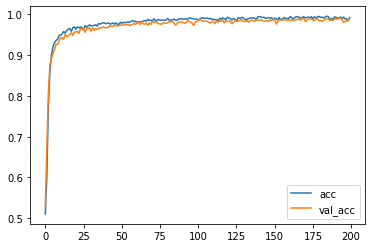

In [15]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
# Now change to the long distance problem

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [17]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 1s 356us/sample - loss: 0.7037 - accuracy: 0.4956 - val_loss: 0.6928 - val_accuracy: 0.5132
Epoch 2/200
2500/2500 [==============================] - 0s 143us/sample - loss: 0.6943 - accuracy: 0.5100 - val_loss: 0.6935 - val_accuracy: 0.5088
Epoch 3/200
2500/2500 [==============================] - 0s 142us/sample - loss: 0.6953 - accuracy: 0.5156 - val_loss: 0.6916 - val_accuracy: 0.5328
Epoch 4/200
2500/2500 [==============================] - 0s 147us/sample - loss: 0.6932 - accuracy: 0.5092 - val_loss: 0.6923 - val_accuracy: 0.5152
Epoch 5/200
2500/2500 [==============================] - 0s 151us/sample - loss: 0.6919 - accuracy: 0.5320 - val_loss: 0.6861 - val_accuracy: 0.5556
Epoch 6/200
2500/2500 [==============================] - 0s 151us/sample - loss: 0.6864 - accuracy: 0.5612 - val_loss: 0.6851 - val_accuracy: 0.5688
Epoch 7/200
2500/2500 [==============================] - 0

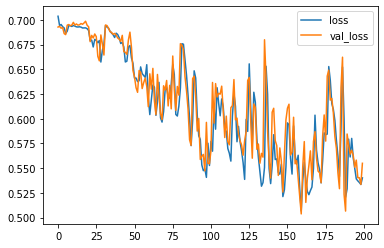

In [18]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

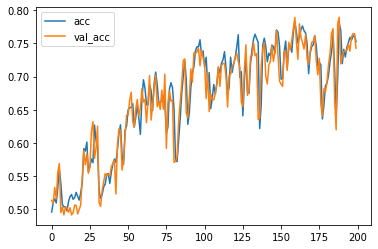

In [19]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [20]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 2s 662us/sample - loss: 0.6951 - accuracy: 0.4884 - val_loss: 0.6934 - val_accuracy: 0.4908
Epoch 2/200
2500/2500 [==============================] - 1s 215us/sample - loss: 0.6930 - accuracy: 0.5036 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 3/200
2500/2500 [==============================] - 1s 212us/sample - loss: 0.6936 - accuracy: 0.4992 - val_loss: 0.6931 - val_accuracy: 0.5144
Epoch 4/200
2500/2500 [==============================] - 1s 216us/sample - loss: 0.6933 - accuracy: 0.5092 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 5/200
2500/2500 [==============================] - 1s 208us/sample - loss: 0.6938 - accuracy: 0.4936 - val_loss: 0.6932 - val_accuracy: 0.5008
Epoch 6/200
2500/2500 [==============================] - 1s 224us/sample - loss: 0.6930 - accuracy: 0.5096 - val_loss: 0.6935 - val_accuracy: 0.5036
Epoch 7/200
2500/2500 [==============================] - 1

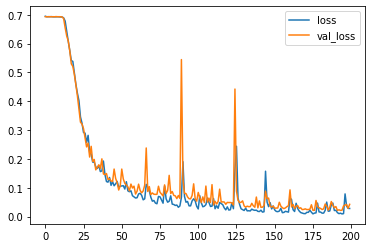

In [21]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

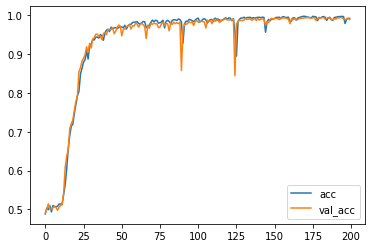

In [22]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
# Make the problem harder by making T larger
T = 20
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [24]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 1s 416us/sample - loss: 0.7063 - accuracy: 0.4964 - val_loss: 0.6979 - val_accuracy: 0.5004
Epoch 2/200
2500/2500 [==============================] - 0s 187us/sample - loss: 0.6956 - accuracy: 0.5068 - val_loss: 0.6924 - val_accuracy: 0.5192
Epoch 3/200
2500/2500 [==============================] - 0s 190us/sample - loss: 0.6944 - accuracy: 0.5160 - val_loss: 0.6927 - val_accuracy: 0.5136
Epoch 4/200
2500/2500 [==============================] - 0s 194us/sample - loss: 0.6952 - accuracy: 0.5124 - val_loss: 0.6928 - val_accuracy: 0.5212
Epoch 5/200
2500/2500 [==============================] - 0s 194us/sample - loss: 0.6942 - accuracy: 0.5092 - val_loss: 0.6948 - val_accuracy: 0.5036
Epoch 6/200
2500/2500 [==============================] - 0s 187us/sample - loss: 0.6941 - accuracy: 0.5096 - val_loss: 0.6951 - val_accuracy: 0.5036
Epoch 7/200
2500/2500 [==============================] - 0

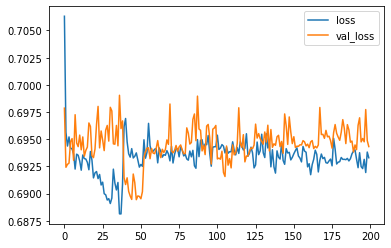

In [25]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

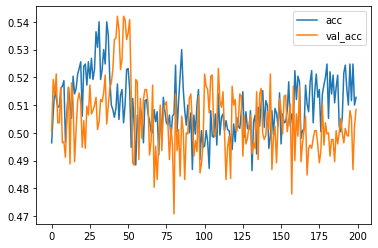

In [26]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [30]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 2s 792us/sample - loss: 0.6948 - accuracy: 0.4908 - val_loss: 0.6935 - val_accuracy: 0.4956
Epoch 2/200
2500/2500 [==============================] - 1s 348us/sample - loss: 0.6944 - accuracy: 0.4912 - val_loss: 0.6930 - val_accuracy: 0.5148
Epoch 3/200
2500/2500 [==============================] - 1s 339us/sample - loss: 0.6937 - accuracy: 0.4888 - val_loss: 0.6928 - val_accuracy: 0.5128
Epoch 4/200
2500/2500 [==============================] - 1s 336us/sample - loss: 0.6937 - accuracy: 0.5044 - val_loss: 0.6928 - val_accuracy: 0.5144
Epoch 5/200
2500/2500 [==============================] - 1s 351us/sample - loss: 0.6932 - accuracy: 0.5020 - val_loss: 0.6929 - val_accuracy: 0.5156
Epoch 6/200
2500/2500 [==============================] - 1s 340us/sample - loss: 0.6936 - accuracy: 0.5068 - val_loss: 0.6931 - val_accuracy: 0.5088
Epoch 7/200
2500/2500 [==============================] - 1

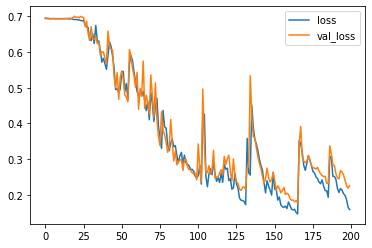

In [31]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

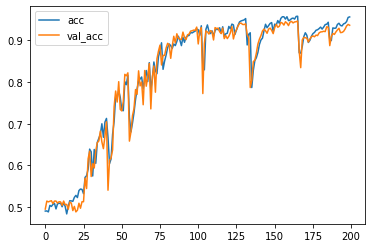

In [32]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [33]:
# Now test our GRU
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = GRU(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/400
2500/2500 [==============================] - 2s 911us/sample - loss: 0.6954 - accuracy: 0.4856 - val_loss: 0.6927 - val_accuracy: 0.5140
Epoch 2/400
2500/2500 [==============================] - 1s 378us/sample - loss: 0.6942 - accuracy: 0.4972 - val_loss: 0.6931 - val_accuracy: 0.5072
Epoch 3/400
2500/2500 [==============================] - 1s 395us/sample - loss: 0.6941 - accuracy: 0.4956 - val_loss: 0.6934 - val_accuracy: 0.5140
Epoch 4/400
2500/2500 [==============================] - 1s 374us/sample - loss: 0.6935 - accuracy: 0.5212 - val_loss: 0.6936 - val_accuracy: 0.5084
Epoch 5/400
2500/2500 [==============================] - 1s 371us/sample - loss: 0.6934 - accuracy: 0.5048 - val_loss: 0.6937 - val_accuracy: 0.5064
Epoch 6/400
2500/2500 [==============================] - 1s 380us/sample - loss: 0.6937 - accuracy: 0.5004 - val_loss: 0.6931 - val_accuracy: 0.5144
Epoch 7/400
2500/2500 [==============================] - 1

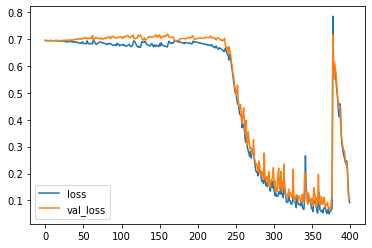

In [34]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

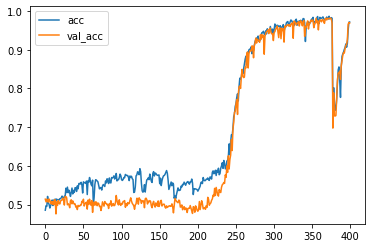

In [35]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
# Make the problem harder by making T larger
T = 30
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [37]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(15)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6945 - accuracy: 0.4964 - val_loss: 0.6934 - val_accuracy: 0.5060
Epoch 2/400
2500/2500 [==============================] - 2s 790us/sample - loss: 0.6930 - accuracy: 0.5068 - val_loss: 0.6955 - val_accuracy: 0.5060
Epoch 3/400
2500/2500 [==============================] - 2s 786us/sample - loss: 0.6935 - accuracy: 0.5196 - val_loss: 0.6937 - val_accuracy: 0.5060
Epoch 4/400
2500/2500 [==============================] - 2s 788us/sample - loss: 0.6928 - accuracy: 0.5180 - val_loss: 0.6934 - val_accuracy: 0.5060
Epoch 5/400
2500/2500 [==============================] - 2s 789us/sample - loss: 0.6925 - accuracy: 0.5068 - val_loss: 0.6951 - val_accuracy: 0.5060
Epoch 6/400
2500/2500 [==============================] - 2s 785us/sample - loss: 0.6922 - accuracy: 0.5180 - val_loss: 0.6942 - val_accuracy: 0.5060
Epoch 7/400
2500/2500 [==============================] - 2s 

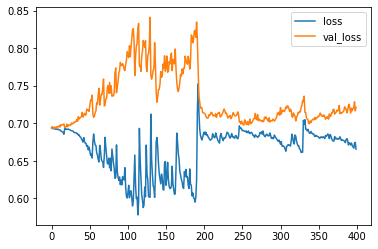

In [38]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

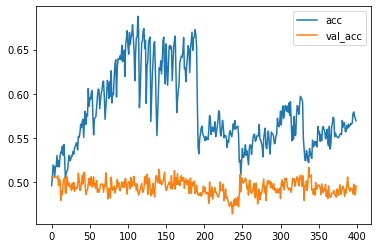

In [39]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
from tensorflow.keras.layers import GlobalMaxPool1D

In [44]:
# Now try a LSTM with Global Max Pooling
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 2
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=100,
  validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6943 - accuracy: 0.5084 - val_loss: 0.6933 - val_accuracy: 0.4936
Epoch 2/100
2500/2500 [==============================] - 2s 860us/sample - loss: 0.6938 - accuracy: 0.4992 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 3/100
2500/2500 [==============================] - 2s 842us/sample - loss: 0.6923 - accuracy: 0.5192 - val_loss: 0.6941 - val_accuracy: 0.5060
Epoch 4/100
2500/2500 [==============================] - 2s 831us/sample - loss: 0.6927 - accuracy: 0.5200 - val_loss: 0.6938 - val_accuracy: 0.5060
Epoch 5/100
2500/2500 [==============================] - 2s 828us/sample - loss: 0.6922 - accuracy: 0.5184 - val_loss: 0.6944 - val_accuracy: 0.5060
Epoch 6/100
2500/2500 [==============================] - 2s 830us/sample - loss: 0.6926 - accuracy: 0.5104 - val_loss: 0.6925 - val_accuracy: 0.5124
Epoch 7/100
2500/2500 [==============================] - 2s 

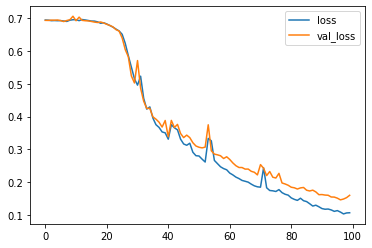

In [45]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

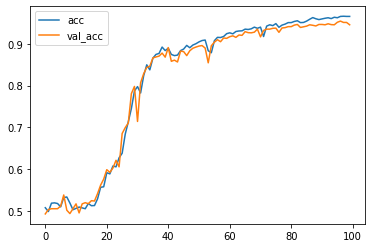

In [46]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()